In [8]:
from pathlib import Path
import pandas as pd

csv_path = Path("projects/CRM_Health_Scoring/data/crm_data_sample.csv")
df = pd.read_csv(csv_path)

print("Shape:", df.shape)
display(df.head(10))

print("\nDtypes:")
print(df.dtypes)

print("\nMissing values:")
print(df.isna().sum())

print("\nNumeric summary:")
display(df.describe(numeric_only=True))

print("\nService_Line distribution:")
print(df["Service_Line"].value_counts())

print("\nCountry distribution:")
print(df["Country"].value_counts())


FileNotFoundError: [Errno 2] No such file or directory: 'projects/CRM_Health_Scoring/data/crm_data_sample.csv'

In [ ]:
from pathlib import Path
import pandas as pd
from IPython.display import display

ROOT = Path.home() / "portfolio"
csv_path = ROOT / "projects/CRM_Health_Scoring/data/crm_data_sample.csv"
print("Leyendo:", csv_path)

if not csv_path.exists():
    raise FileNotFoundError(f"No existe: {csv_path}")

df = pd.read_csv(csv_path)

print("Shape:", df.shape)
display(df.head(10))

print("\nDtypes:")
print(df.dtypes)

print("\nMissing values:")
print(df.isna().sum())

print("\nNumeric summary:")
num = df.select_dtypes(include='number')
display(num.describe())


print("\nService_Line distribution:")
print(df["Service_Line"].value_counts())

print("\nCountry distribution:")
print(df["Country"].value_counts())



Leyendo: /home/maria/portfolio/projects/CRM_Health_Scoring/data/crm_data_sample.csv
Shape: (60, 9)


,Client_ID,Country,Service_Line,Engagement_Rate,Response_Time_Hours,Leads_Converted,Satisfaction_Score,Revenue_Last_Year_EUR,Churn_Risk
0,C0001,Spain,Public Health NGO,0.579,41.0,10,6.3,180619.48,0
1,C0002,Denmark,Home Care Provider,0.728,15.2,6,8.6,478748.67,0
2,C0003,Sweden,Mental Health Services,0.562,13.3,8,7.6,414824.58,0
3,C0004,Portugal,Public Health NGO,0.617,26.7,3,9.4,265753.15,0
4,C0005,Portugal,Mental Health Services,0.691,19.3,10,8.2,537759.49,0
5,C0006,Ireland,Mental Health Services,0.721,27.2,16,8.3,203702.24,0
6,C0007,Spain,Public Health NGO,0.690,32.5,9,7.7,80000.00,0
7,C0008,Sweden,Mental Health Services,0.736,20.1,6,8.6,581322.84,0
8,C0009,Italy,Primary Care Clinic,0.676,22.5,10,8.3,751461.29,0
9,C0010,Spain,Diagnostics Lab,0.588,8.9,11,8.4,414205.62,0



Dtypes:
Client_ID                 object
Country                   object
Service_Line              object
Engagement_Rate          float64
Response_Time_Hours      float64
Leads_Converted            int64
Satisfaction_Score       float64
Revenue_Last_Year_EUR    float64
Churn_Risk                 int64
dtype: object

Missing values:
Client_ID                0
Country                  0
Service_Line             0
Engagement_Rate          0
Response_Time_Hours      0
Leads_Converted          0
Satisfaction_Score       0
Revenue_Last_Year_EUR    0
Churn_Risk               0
dtype: int64

Numeric summary:


,Engagement_Rate,Response_Time_Hours,Leads_Converted,Satisfaction_Score,Revenue_Last_Year_EUR,Churn_Risk
count,60.000000,60.00000,60.000000,60.000000,6.000000e+01,60.0
mean,0.653717,16.94500,9.166667,7.573333,5.092920e+05,0.0
std,0.068264,8.63908,3.814187,0.808402,2.297600e+05,0.0
min,0.519000,5.10000,2.000000,5.700000,8.000000e+04,0.0
25%,0.613000,11.57500,6.750000,7.000000,3.458720e+05,0.0
50%,0.652000,15.20000,8.500000,7.600000,4.977128e+05,0.0
75%,0.693750,20.30000,11.000000,8.200000,6.035168e+05,0.0
max,0.809000,46.10000,18.000000,9.400000,1.272424e+06,0.0



Service_Line distribution:
Service_Line
Home Care Provider        13
Diagnostics Lab           11
Mental Health Services     8
Rehabilitation Center      8
Primary Care Clinic        8
Telemedicine Provider      7
Public Health NGO          5
Name: count, dtype: int64

Country distribution:
Country
Denmark        11
Portugal        9
Spain           7
Ireland         7
Sweden          6
Netherlands     6
France          5
Italy           3
Belgium         3
Germany         3
Name: count, dtype: int64


In [ ]:
import pandas as pd
from pathlib import Path

# Min–max robusto (evita división por cero)
def mm(s: pd.Series) -> pd.Series:
    a, b = s.min(), s.max()
    if b > a:
        return (s - a) / (b - a)
    return pd.Series(0.5, index=s.index)

# Pesos del score (sum = 1)
w = {
    "Engagement_Rate":       0.35,  # más alto = mejor
    "Satisfaction_Score":    0.25,  # más alto = mejor
    "Leads_Converted":       0.20,  # más alto = mejor
    "Revenue_Last_Year_EUR": 0.10,  # más alto = mejor
    "Response_Time_Hours":   0.10,  # más alto = peor (resta)
}

score = (
    w["Engagement_Rate"]       * mm(df["Engagement_Rate"]) +
    w["Satisfaction_Score"]    * mm(df["Satisfaction_Score"]) +
    w["Leads_Converted"]       * mm(df["Leads_Converted"]) +
    w["Revenue_Last_Year_EUR"] * mm(df["Revenue_Last_Year_EUR"]) -
    w["Response_Time_Hours"]   * mm(df["Response_Time_Hours"])
)

df["Health_Score"] = (100 * score).round(1)

# Vista rápida
display(
    df[["Client_ID","Service_Line","Country","Health_Score","Churn_Risk"]]
      .sort_values("Health_Score", ascending=False)
      .head(10)
)

print("\nMedia de Health_Score por Churn_Risk (0=no churn, 1=churn):")
print(df.groupby("Churn_Risk")["Health_Score"].mean().round(2))

# Guardar enriquecido
out_enriched = ROOT / "projects/CRM_Health_Scoring/reports/crm_enriched_with_score.csv"
out_enriched.parent.mkdir(parents=True, exist_ok=True)
df.to_csv(out_enriched, index=False)
print(f"\nSaved: {out_enriched}")


,Client_ID,Service_Line,Country,Health_Score,Churn_Risk
17,C0018,Telemedicine Provider,France,75.2,0
22,C0023,Telemedicine Provider,France,69.7,0
50,C0051,Telemedicine Provider,Denmark,59.9,0
58,C0059,Telemedicine Provider,Denmark,57.2,0
59,C0060,Primary Care Clinic,Sweden,56.3,0
11,C0012,Telemedicine Provider,Belgium,55.1,0
5,C0006,Mental Health Services,Ireland,55.1,0
27,C0028,Mental Health Services,Ireland,54.0,0
31,C0032,Home Care Provider,Italy,52.8,0
43,C0044,Primary Care Clinic,Germany,51.9,0



Media de Health_Score por Churn_Risk (0=no churn, 1=churn):
Churn_Risk
0    38.59
Name: Health_Score, dtype: float64

Saved: /home/maria/portfolio/projects/CRM_Health_Scoring/reports/crm_enriched_with_score.csv


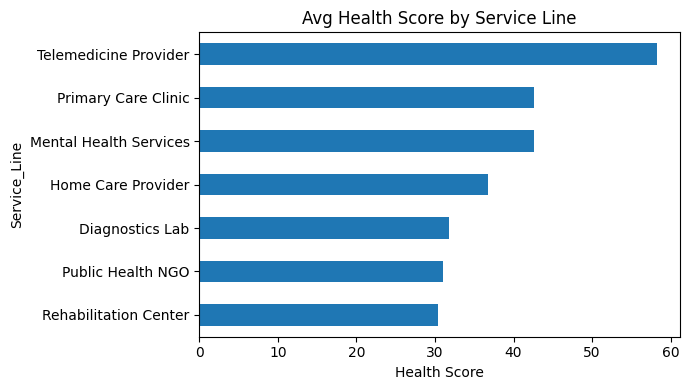

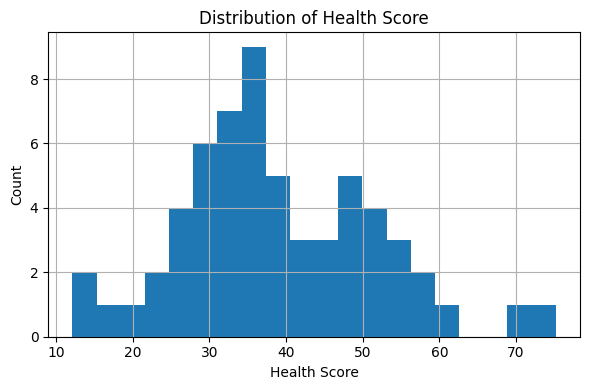

In [ ]:
import matplotlib.pyplot as plt

# Media del Health Score por Service Line
ax = df.groupby('Service_Line')['Health_Score'].mean().sort_values().plot(kind='barh', figsize=(7,4))
ax.set_title('Avg Health Score by Service Line')
ax.set_xlabel('Health Score')
plt.tight_layout()
plt.show()

# Distribución del Health Score
ax = df['Health_Score'].hist(bins=20, figsize=(6,4))
ax.set_title('Distribution of Health Score')
ax.set_xlabel('Health Score')
ax.set_ylabel('Count')
plt.tight_layout()
plt.show()


In [ ]:
low, high = df['Health_Score'].quantile([0.25, 0.75])
df['Action_Bucket'] = pd.cut(
    df['Health_Score'],
    bins=[-1e9, low, high, 1e9],
    labels=['At Risk', 'Monitor', 'Healthy']
)

display(df['Action_Bucket'].value_counts())


Action_Bucket
Monitor    30
At Risk    15
Healthy    15
Name: count, dtype: int64